https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [46]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 3.9 MB/s eta 0:00:00a 0:00:01


In [47]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
!pip install ucimlrepo

In [38]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

df = pd.read_csv('magic04.data', names = cols)

df.head()
# df

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [39]:
df['class'] = (df['class'] == 'g').astype(int)

df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

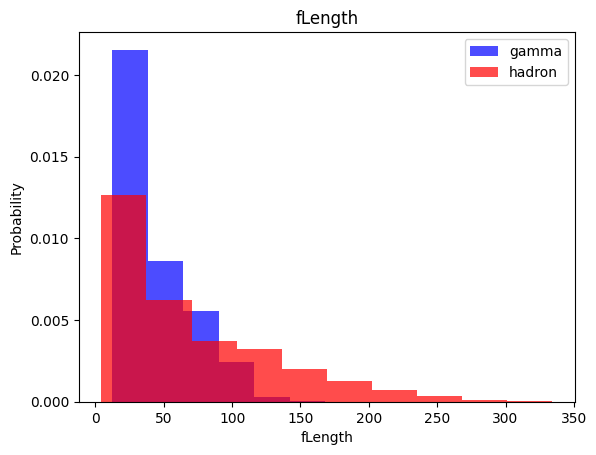

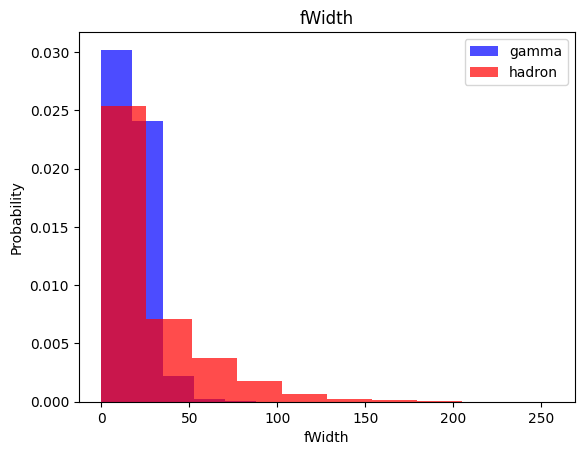

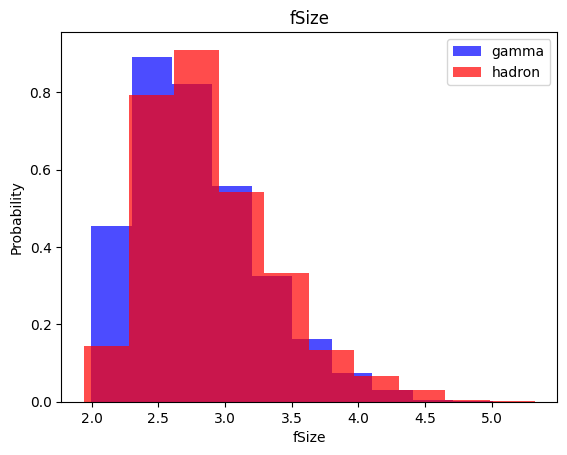

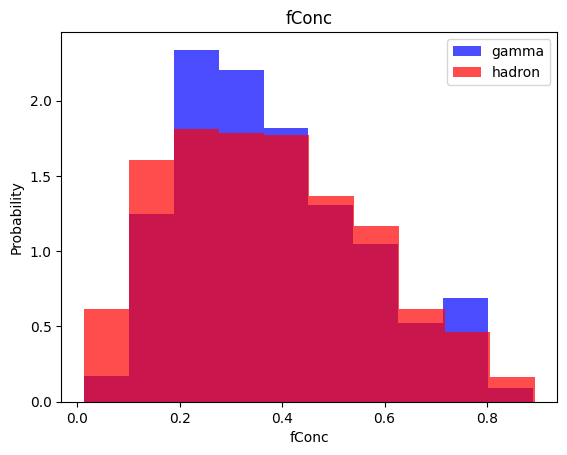

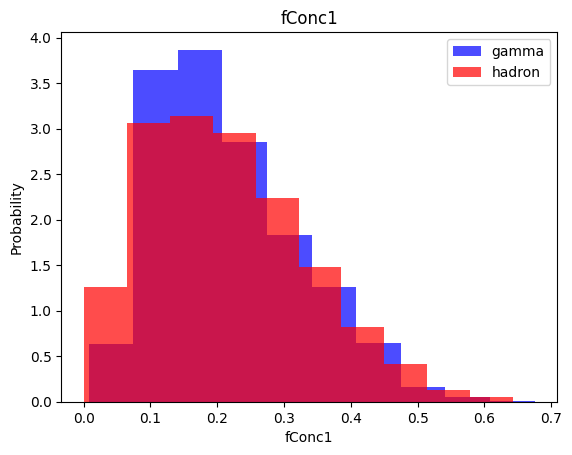

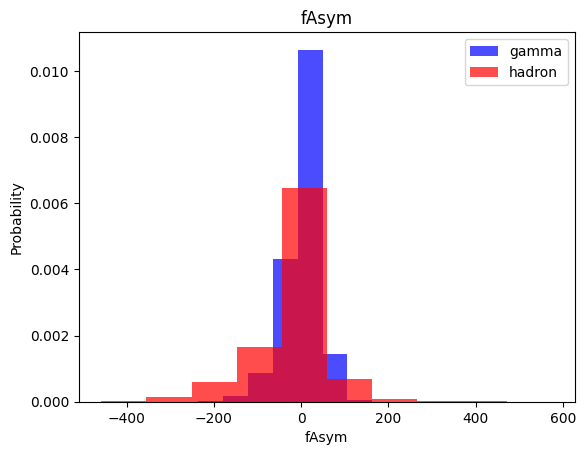

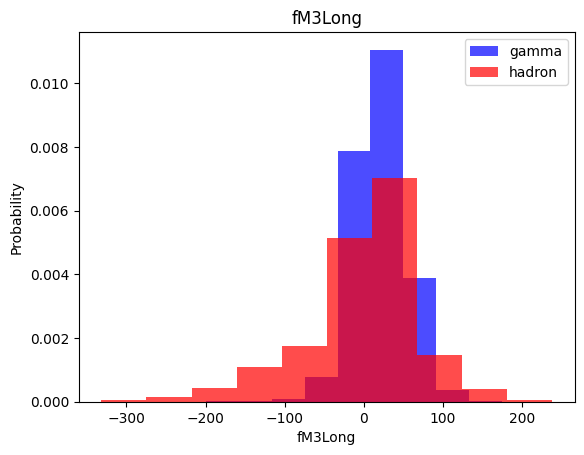

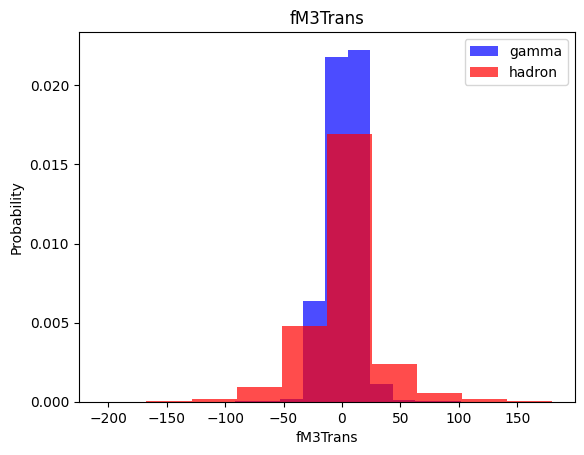

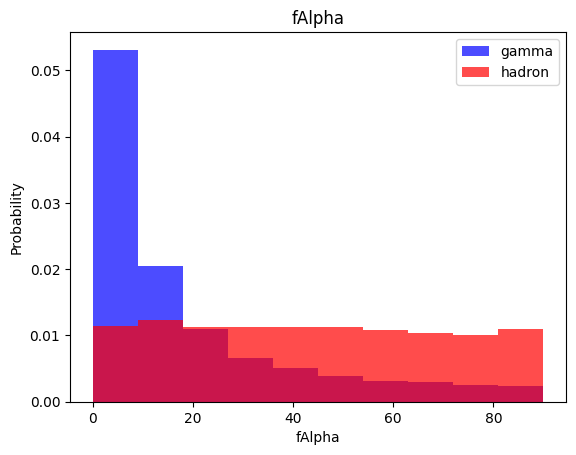

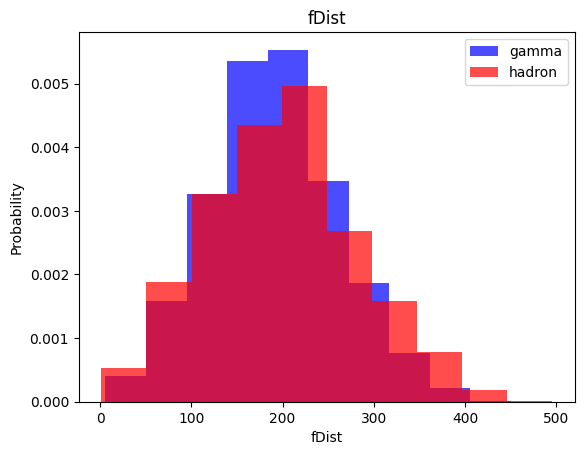

In [41]:
for label in df.columns[:-1]:
    plt.hist(df[df['class'] == 1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df['class'] == 0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

Train, validation, test datasets

In [55]:
train, valid, test = np.split(df.sample(frac=1), [int(.6 * len(df)), int (.8 * len(df))])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [48]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y



    

In [56]:
# print(len(train[train['class'] == 1])) # gammas
# print(len(train[train['class'] == 0])) # alphas

train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [51]:
len(y_train)

14972

In [58]:
sum(y_train == 1)

7418

In [53]:
sum(y_train == 0)

7486

# kNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [69]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [70]:
y_pred = knn_model.predict(X_test)

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74      1346
           1       0.85      0.87      0.86      2458

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB

In [74]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [75]:
y_pred = nb_model.predict(X_test)

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.40      0.51      1346
           1       0.73      0.90      0.81      2458

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.72      0.70      3804



# Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [80]:
y_pred = lg_model.predict(X_test)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1346
           1       0.84      0.82      0.83      2458

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# SVM

In [82]:
from sklearn.svm import SVC

In [83]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [84]:
y_pred = svm_model.predict(X_test)

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1346
           1       0.89      0.90      0.90      2458

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# NN

In [87]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 MB 4.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 5.6 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 5.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 5.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.6/393.6 kB 5.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 5.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.3 MB/s eta 

In [88]:
import tensorflow as tf

In [103]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()

# def plot_accuracy(history):
#     plt.plot(history.history['accuracy'], label='accuracy')
#     plt.plot(history.history['val_accuracy'], label='val_accuracy')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

In [97]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])

    history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

    return nn_model, history


16 nodes, dropout 0, lr 0.1, batch_size 32
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 576us/step - accuracy: 0.7792 - loss: 0.4698 - val_accuracy: 0.3824 - val_loss: 0.8985
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.8009 - loss: 0.4344 - val_accuracy: 0.6162 - val_loss: 0.8240
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - accuracy: 0.8468 - loss: 0.3712 - val_accuracy: 0.7648 - val_loss: 0.4151
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.8434 - loss: 0.3704 - val_accuracy: 0.7773 - val_loss: 0.6172
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.8415 - loss: 0.3845 - val_accuracy: 0.7335 - val_loss: 0.4838
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - accuracy: 0.8433 - loss: 0.3716 - val_accuracy: 0.6452 - val_loss: 0.6856
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.8376 - loss: 0.3716 - val_accuracy: 0.8824 - val_loss: 0.3367
Epoch 8/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.8467 - loss: 0.3692 - val_

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - accuracy: 0.8581 - loss: 0.4087
16 nodes, dropout 0, lr 0.1, batch_size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.8002 - loss: 0.4424 - val_accuracy: 0.6193 - val_loss: 0.5886
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.8375 - loss: 0.3833 - val_accuracy: 0.6297 - val_loss: 0.5443
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 0.8355 - loss: 0.3801 - val_accuracy: 0.6951 - val_loss: 0.5785
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - accuracy: 0.8200 - loss: 0.3978 - val_accuracy: 0.8447 - val_loss: 0.3551
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - accuracy: 0.8484 - loss: 0.3544 - val_accuracy: 0.7139 - val_loss: 0.6802
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - accuracy: 0.8499 - loss: 0.3535 - val_accuracy: 0.7035 - val_loss: 0.6068
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 0.8572 - loss: 0.3436 - val

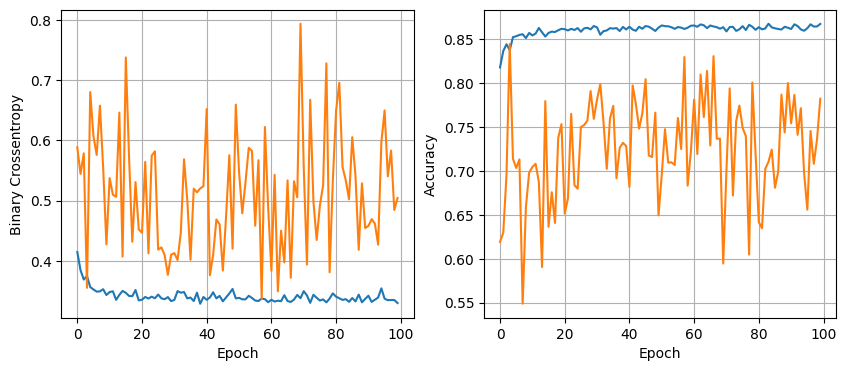

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - accuracy: 0.8628 - loss: 0.3609
16 nodes, dropout 0, lr 0.1, batch_size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7729 - loss: 0.4794 - val_accuracy: 0.6708 - val_loss: 0.5903
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.8526 - loss: 0.3576 - val_accuracy: 0.6843 - val_loss: 0.5263
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.8541 - loss: 0.3525 - val_accuracy: 0.7234 - val_loss: 0.4611
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.8545 - loss: 0.3445 - val_accuracy: 0.6867 - val_loss: 0.5632
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.8581 - loss: 0.3401 - val_accuracy: 0.7429 - val_loss: 0.4625
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.8593 - loss: 0.3414 - val_accuracy: 0.7241 - val_loss: 0.4658
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.8561 - loss: 0.3392 - val_accuracy: 0.73

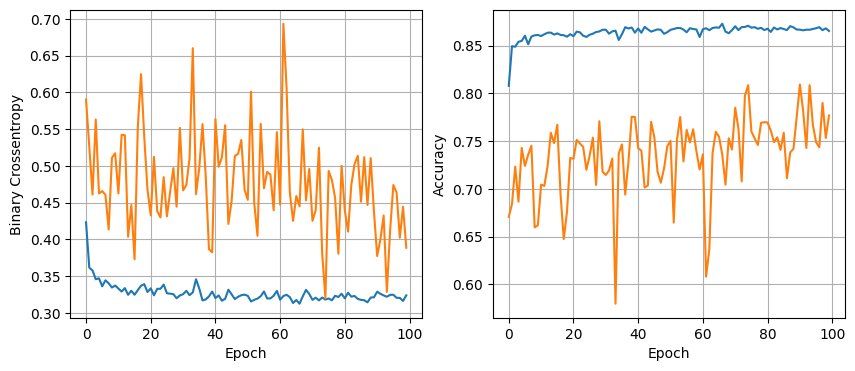

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - accuracy: 0.8645 - loss: 0.3430
16 nodes, dropout 0, lr 0.005, batch_size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.7547 - loss: 0.4936 - val_accuracy: 0.7109 - val_loss: 0.5803
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.8477 - loss: 0.3575 - val_accuracy: 0.8090 - val_loss: 0.3901
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.8553 - loss: 0.3413 - val_accuracy: 0.7244 - val_loss: 0.5403
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.8618 - loss: 0.3322 - val_accuracy: 0.7487 - val_loss: 0.4874
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8645 - loss: 0.3207 - val_accuracy: 0.7143 - val_loss: 0.5393
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.8617 - loss: 0.3290 - val_accuracy: 0.7220 - val_loss: 0.5636
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.8608 - loss: 0.3287 - v

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - accuracy: 0.8708 - loss: 0.3278
16 nodes, dropout 0, lr 0.005, batch_size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.7225 - loss: 0.5218 - val_accuracy: 0.6947 - val_loss: 0.5773
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.8460 - loss: 0.3719 - val_accuracy: 0.8009 - val_loss: 0.4261
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - accuracy: 0.8461 - loss: 0.3517 - val_accuracy: 0.7995 - val_loss: 0.3915
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - accuracy: 0.8564 - loss: 0.3408 - val_accuracy: 0.7301 - val_loss: 0.5146
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - accuracy: 0.8681 - loss: 0.3168 - val_accuracy: 0.7574 - val_loss: 0.4529
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - accuracy: 0.8635 - loss: 0.3270 - val_accuracy: 0.6941 - val_loss: 0.5835
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.8591 - loss: 0.3214 - v

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - accuracy: 0.8714 - loss: 0.3191
16 nodes, dropout 0, lr 0.005, batch_size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7399 - loss: 0.5287 - val_accuracy: 0.6425 - val_loss: 0.6095
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.8276 - loss: 0.3922 - val_accuracy: 0.7305 - val_loss: 0.5509
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.8448 - loss: 0.3678 - val_accuracy: 0.7699 - val_loss: 0.4726
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.8602 - loss: 0.3430 - val_accuracy: 0.7011 - val_loss: 0.6027
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.8616 - loss: 0.3369 - val_accuracy: 0.7305 - val_loss: 0.5307
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.8681 - loss: 0.3212 - val_accuracy: 0.7551 - val_loss: 0.4701
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.8617 - loss: 0.3311 - val_accuracy: 0.

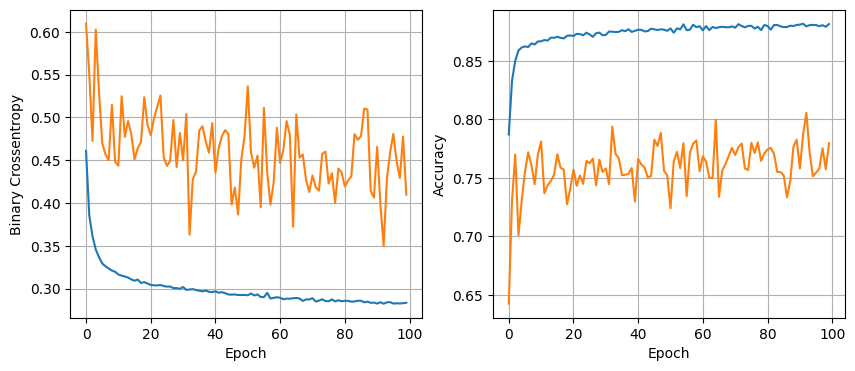

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.8662 - loss: 0.3147
16 nodes, dropout 0, lr 0.001, batch_size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.6271 - loss: 0.6139 - val_accuracy: 0.5640 - val_loss: 0.6863
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.8178 - loss: 0.4041 - val_accuracy: 0.6459 - val_loss: 0.6406
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.8402 - loss: 0.3720 - val_accuracy: 0.7150 - val_loss: 0.5354
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - accuracy: 0.8454 - loss: 0.3654 - val_accuracy: 0.7503 - val_loss: 0.4930
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 0.8535 - loss: 0.3505 - val_accuracy: 0.7220 - val_loss: 0.5363
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.8603 - loss: 0.3353 - val_accuracy: 0.7254 - val_loss: 0.5118
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.8571 - loss: 0.3455 - v

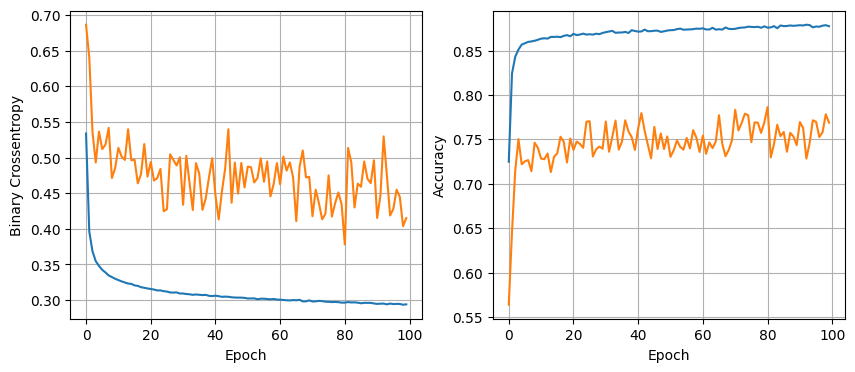

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - accuracy: 0.8693 - loss: 0.3260
16 nodes, dropout 0, lr 0.001, batch_size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.5693 - loss: 0.6653 - val_accuracy: 0.5411 - val_loss: 0.7027
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.7947 - loss: 0.4411 - val_accuracy: 0.5980 - val_loss: 0.6317
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - accuracy: 0.8093 - loss: 0.4165 - val_accuracy: 0.6186 - val_loss: 0.6410
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.8149 - loss: 0.4063 - val_accuracy: 0.6412 - val_loss: 0.6102
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - accuracy: 0.8261 - loss: 0.3933 - val_accuracy: 0.6732 - val_loss: 0.5794
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.8355 - loss: 0.3845 - val_accuracy: 0.6860 - val_loss: 0.5763
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - accuracy: 0.8415 - loss: 0.3774 - v

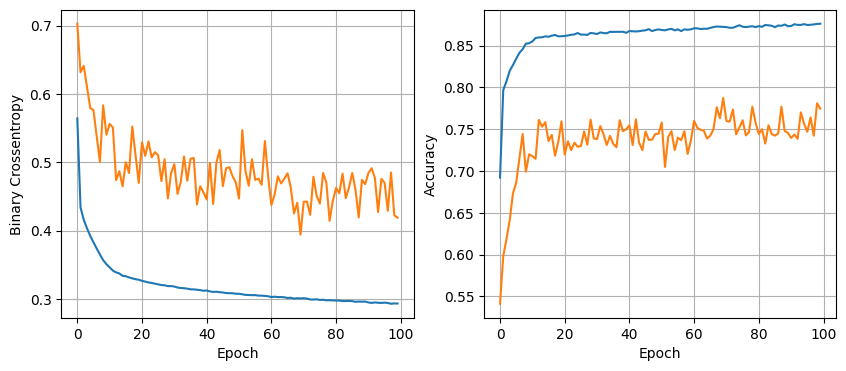

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.8648 - loss: 0.3139
16 nodes, dropout 0, lr 0.001, batch_size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6469 - loss: 0.7258 - val_accuracy: 0.4441 - val_loss: 0.7654
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.7792 - loss: 0.4996 - val_accuracy: 0.6220 - val_loss: 0.6569
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.8090 - loss: 0.4222 - val_accuracy: 0.6314 - val_loss: 0.6436
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.8299 - loss: 0.3853 - val_accuracy: 0.6813 - val_loss: 0.5714
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.8313 - loss: 0.3832 - val_accuracy: 0.6904 - val_loss: 0.5702
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.8442 - loss: 0.3704 - val_accuracy: 0.6971 - val_loss: 0.5634
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.8467 - loss: 0.3641 - val_accuracy: 0.

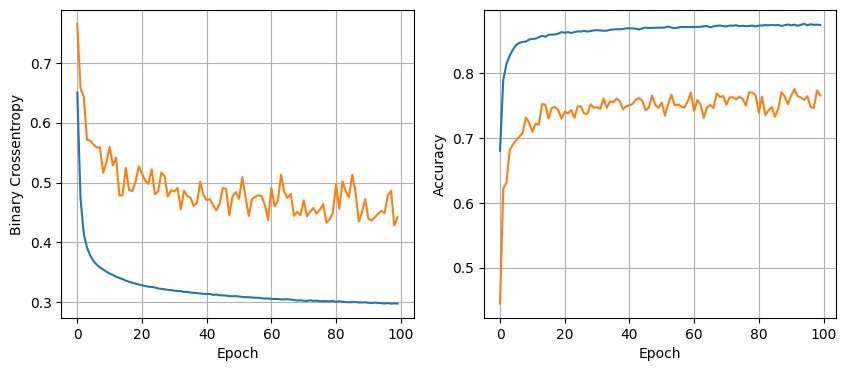

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - accuracy: 0.8605 - loss: 0.3244
16 nodes, dropout 0.2, lr 0.1, batch_size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 496us/step - accuracy: 0.7549 - loss: 0.5336 - val_accuracy: 0.4057 - val_loss: 0.7857
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.7801 - loss: 0.4994 - val_accuracy: 0.5408 - val_loss: 0.7751
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.7920 - loss: 0.4860 - val_accuracy: 0.5111 - val_loss: 0.9150
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.7814 - loss: 0.5242 - val_accuracy: 0.3888 - val_loss: 0.9821
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.7820 - loss: 0.5105 - val_accuracy: 0.6361 - val_loss: 0.7934
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.8049 - loss: 0.4670 - val_accuracy: 0.6307 - val_loss: 0.6741
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.7864 - loss: 0.5055 - v

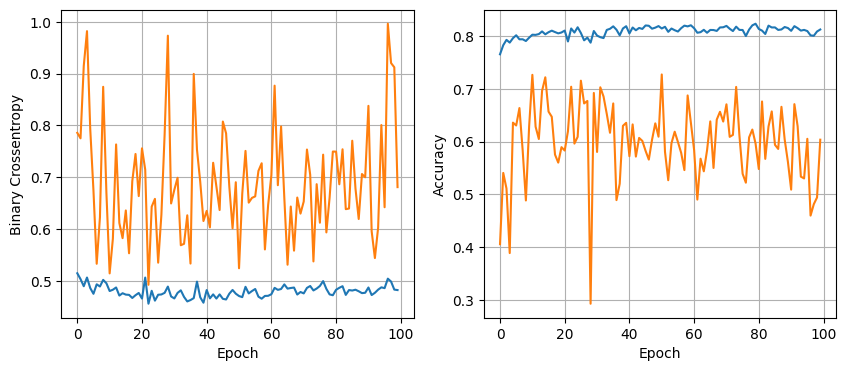

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - accuracy: 0.8443 - loss: 0.4157
16 nodes, dropout 0.2, lr 0.1, batch_size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - accuracy: 0.7473 - loss: 0.5232 - val_accuracy: 0.6520 - val_loss: 0.5539
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.7871 - loss: 0.4605 - val_accuracy: 0.5805 - val_loss: 0.5809
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.7856 - loss: 0.4483 - val_accuracy: 0.7146 - val_loss: 0.5928
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.7928 - loss: 0.4667 - val_accuracy: 0.6456 - val_loss: 0.6593
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.8027 - loss: 0.4552 - val_accuracy: 0.6226 - val_loss: 0.8582
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.7892 - loss: 0.4554 - val_accuracy: 0.6166 - val_loss: 0.5617
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.7909 - loss: 0.4422 - v

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - accuracy: 0.8509 - loss: 0.3950
16 nodes, dropout 0.2, lr 0.1, batch_size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7564 - loss: 0.5052 - val_accuracy: 0.6563 - val_loss: 0.5924
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.8120 - loss: 0.4439 - val_accuracy: 0.5745 - val_loss: 0.6326
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.8129 - loss: 0.4292 - val_accuracy: 0.6354 - val_loss: 0.5623
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.8268 - loss: 0.4113 - val_accuracy: 0.6604 - val_loss: 0.5041
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.8309 - loss: 0.4095 - val_accuracy: 0.6257 - val_loss: 0.5414
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.8321 - loss: 0.3966 - val_accuracy: 0.6405 - val_loss: 0.6318
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.8357 - loss: 0.3993 - val_accuracy: 0.

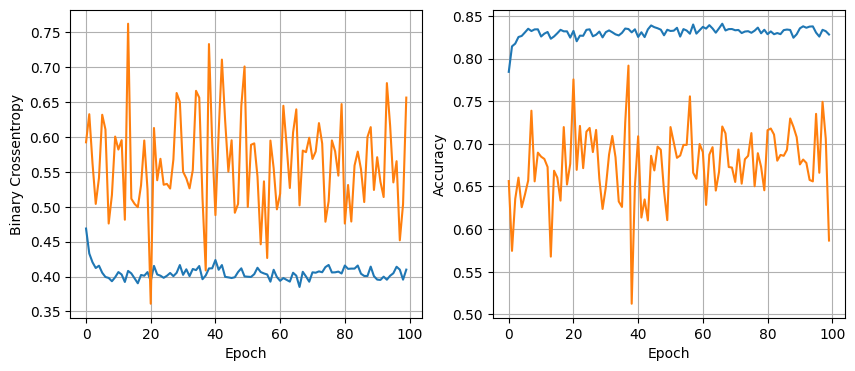

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.8395 - loss: 0.3784
16 nodes, dropout 0.2, lr 0.005, batch_size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 509us/step - accuracy: 0.7319 - loss: 0.5286 - val_accuracy: 0.6779 - val_loss: 0.6301
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.8113 - loss: 0.4232 - val_accuracy: 0.7301 - val_loss: 0.5324
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - accuracy: 0.8261 - loss: 0.4050 - val_accuracy: 0.6786 - val_loss: 0.5924
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - accuracy: 0.8326 - loss: 0.3918 - val_accuracy: 0.7180 - val_loss: 0.5222
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.8374 - loss: 0.3798 - val_accuracy: 0.7365 - val_loss: 0.4959
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.8442 - loss: 0.3712 - val_accuracy: 0.7187 - val_loss: 0.5286
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.8516 - loss: 0.3552 -

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.8587 - loss: 0.3199
16 nodes, dropout 0.2, lr 0.005, batch_size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - accuracy: 0.7190 - loss: 0.5351 - val_accuracy: 0.6496 - val_loss: 0.6086
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.8198 - loss: 0.4155 - val_accuracy: 0.7106 - val_loss: 0.5470
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.8253 - loss: 0.4045 - val_accuracy: 0.7439 - val_loss: 0.4830
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8408 - loss: 0.3744 - val_accuracy: 0.7574 - val_loss: 0.4767
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.8430 - loss: 0.3748 - val_accuracy: 0.7204 - val_loss: 0.5273
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.8488 - loss: 0.3625 - val_accuracy: 0.7372 - val_loss: 0.4829
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.8464 - loss: 0.3609 -

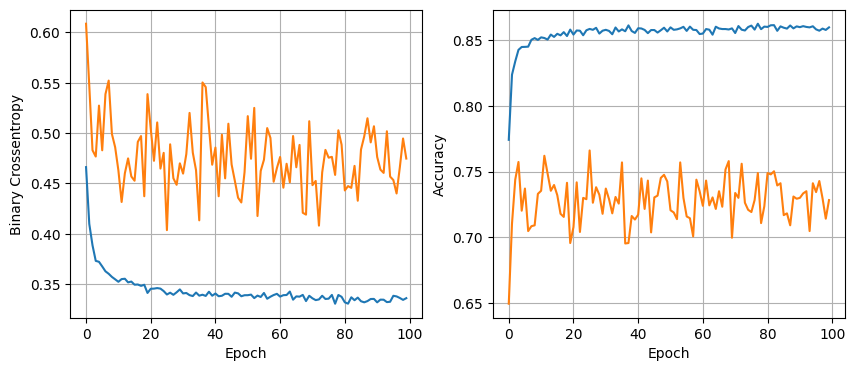

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - accuracy: 0.8634 - loss: 0.3152
16 nodes, dropout 0.2, lr 0.005, batch_size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6796 - loss: 0.5809 - val_accuracy: 0.6358 - val_loss: 0.5905
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.8040 - loss: 0.4285 - val_accuracy: 0.6826 - val_loss: 0.5440
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.8229 - loss: 0.4136 - val_accuracy: 0.6816 - val_loss: 0.5907
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.8285 - loss: 0.3932 - val_accuracy: 0.7315 - val_loss: 0.5134
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.8338 - loss: 0.3950 - val_accuracy: 0.7409 - val_loss: 0.5003
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.8416 - loss: 0.3795 - val_accuracy: 0.7271 - val_loss: 0.5267
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.8499 - loss: 0.3650 - val_accuracy: 

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 0.8605 - loss: 0.3185
16 nodes, dropout 0.2, lr 0.001, batch_size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 508us/step - accuracy: 0.6630 - loss: 0.6547 - val_accuracy: 0.5910 - val_loss: 0.6688
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.7710 - loss: 0.4747 - val_accuracy: 0.6247 - val_loss: 0.6392
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.7884 - loss: 0.4548 - val_accuracy: 0.6688 - val_loss: 0.5984
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.8089 - loss: 0.4343 - val_accuracy: 0.6469 - val_loss: 0.6418
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.8093 - loss: 0.4272 - val_accuracy: 0.6830 - val_loss: 0.5961
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.8251 - loss: 0.4078 - val_accuracy: 0.7075 - val_loss: 0.5614
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.8249 - loss: 0.4064 -

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.8619 - loss: 0.3215
16 nodes, dropout 0.2, lr 0.001, batch_size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.5557 - loss: 0.6925 - val_accuracy: 0.5374 - val_loss: 0.6187
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.7567 - loss: 0.5144 - val_accuracy: 0.5708 - val_loss: 0.6406
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.7785 - loss: 0.4773 - val_accuracy: 0.5994 - val_loss: 0.6203
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.7914 - loss: 0.4525 - val_accuracy: 0.5980 - val_loss: 0.6309
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.7989 - loss: 0.4409 - val_accuracy: 0.6102 - val_loss: 0.6254
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.8078 - loss: 0.4242 - val_accuracy: 0.6466 - val_loss: 0.5873
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.8146 - loss: 0.4227 -

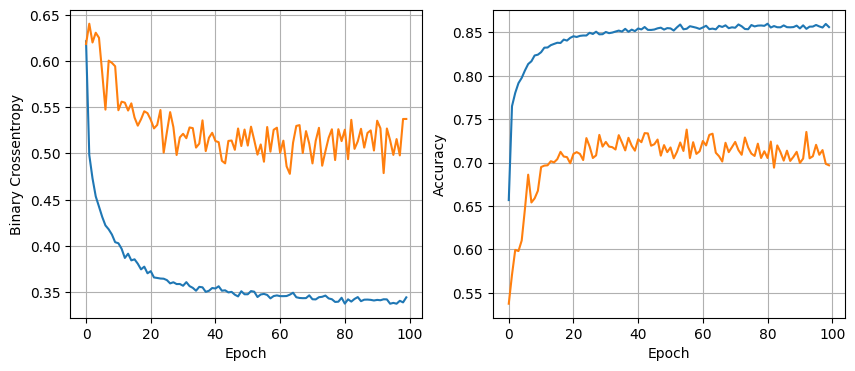

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.8590 - loss: 0.3217
16 nodes, dropout 0.2, lr 0.001, batch_size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6106 - loss: 0.6588 - val_accuracy: 0.5007 - val_loss: 0.6825
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.7519 - loss: 0.5203 - val_accuracy: 0.5438 - val_loss: 0.6852
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.7859 - loss: 0.4685 - val_accuracy: 0.6139 - val_loss: 0.6327
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.7951 - loss: 0.4509 - val_accuracy: 0.6439 - val_loss: 0.6183
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.7953 - loss: 0.4508 - val_accuracy: 0.6637 - val_loss: 0.5924
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.8063 - loss: 0.4337 - val_accuracy: 0.6546 - val_loss: 0.6002
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.8077 - loss: 0.4353 - val_accuracy: 

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.8578 - loss: 0.3255
32 nodes, dropout 0, lr 0.1, batch_size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 502us/step - accuracy: 0.7784 - loss: 0.5001 - val_accuracy: 0.6466 - val_loss: 0.5883
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.8465 - loss: 0.3837 - val_accuracy: 0.5980 - val_loss: 0.6199
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.8420 - loss: 0.3796 - val_accuracy: 0.5920 - val_loss: 0.7436
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.8161 - loss: 0.4057 - val_accuracy: 0.5586 - val_loss: 1.0982
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.8284 - loss: 0.4181 - val_accuracy: 0.7419 - val_loss: 0.4566
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.8409 - loss: 0.3847 - val_accuracy: 0.6240 - val_loss: 0.7290
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.8510 - loss: 0.3710 - val

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.8691 - loss: 0.3630
32 nodes, dropout 0, lr 0.1, batch_size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.7685 - loss: 0.4845 - val_accuracy: 0.6691 - val_loss: 0.6574
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.8457 - loss: 0.3829 - val_accuracy: 0.5492 - val_loss: 0.7213
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.8281 - loss: 0.3770 - val_accuracy: 0.7284 - val_loss: 0.5369
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.8516 - loss: 0.3663 - val_accuracy: 0.6557 - val_loss: 0.5604
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.8412 - loss: 0.3718 - val_accuracy: 0.7476 - val_loss: 0.5347
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.8447 - loss: 0.3637 - val_accuracy: 0.8315 - val_loss: 0.4130
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.8519 - loss: 0.3479 - val

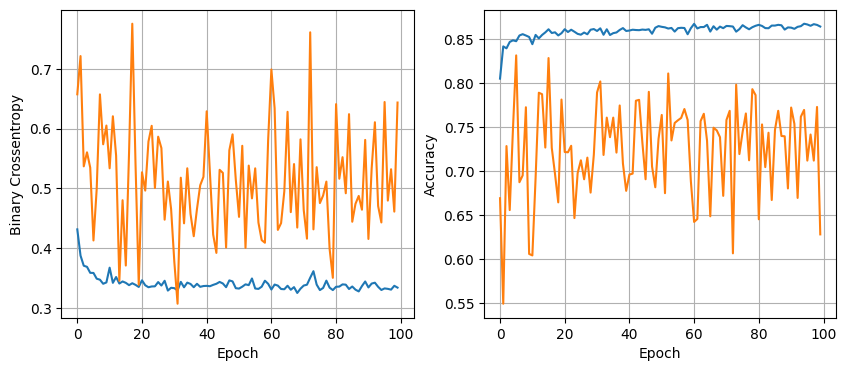

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.8491 - loss: 0.3703
32 nodes, dropout 0, lr 0.1, batch_size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7521 - loss: 0.5015 - val_accuracy: 0.5940 - val_loss: 0.7445
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.8382 - loss: 0.3713 - val_accuracy: 0.7086 - val_loss: 0.5508
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.8536 - loss: 0.3571 - val_accuracy: 0.6381 - val_loss: 0.6555
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.8521 - loss: 0.3543 - val_accuracy: 0.6971 - val_loss: 0.5470
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.8521 - loss: 0.3482 - val_accuracy: 0.7776 - val_loss: 0.3894
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.8606 - loss: 0.3303 - val_accuracy: 0.7497 - val_loss: 0.5812
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.8592 - loss: 0.3386 - val_accuracy: 0.64

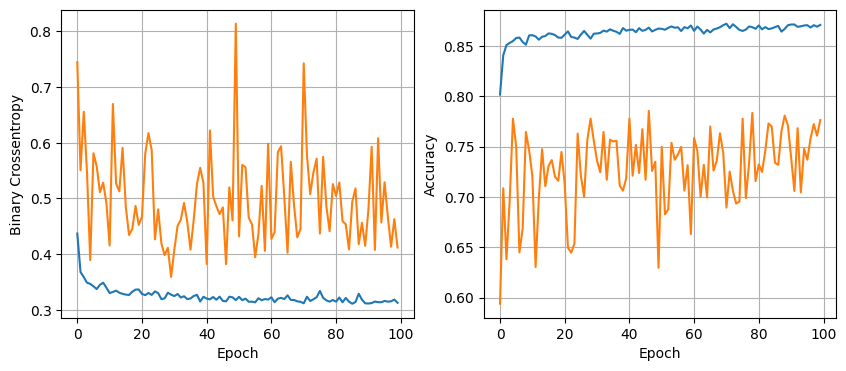

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.8662 - loss: 0.3338
32 nodes, dropout 0, lr 0.005, batch_size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 497us/step - accuracy: 0.7846 - loss: 0.4541 - val_accuracy: 0.7857 - val_loss: 0.4501
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.8440 - loss: 0.3615 - val_accuracy: 0.7433 - val_loss: 0.4777
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.8591 - loss: 0.3420 - val_accuracy: 0.7807 - val_loss: 0.4067
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.8587 - loss: 0.3272 - val_accuracy: 0.7301 - val_loss: 0.4956
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.8611 - loss: 0.3299 - val_accuracy: 0.7601 - val_loss: 0.4642
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.8661 - loss: 0.3167 - val_accuracy: 0.7396 - val_loss: 0.4923
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.8646 - loss: 0.3179 - v

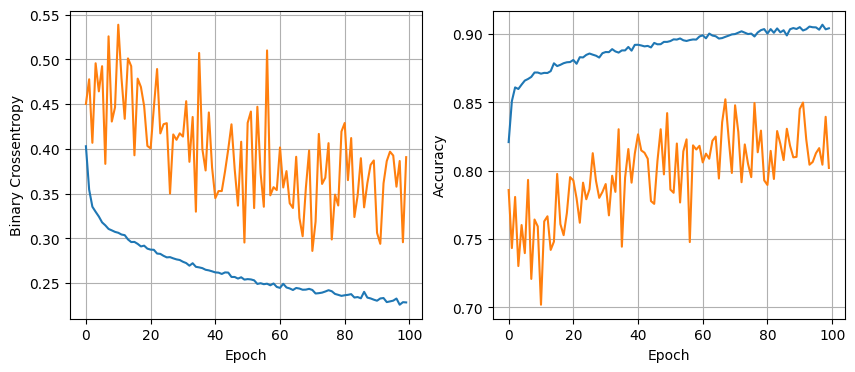

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.8705 - loss: 0.3454
32 nodes, dropout 0, lr 0.005, batch_size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.7833 - loss: 0.4681 - val_accuracy: 0.7608 - val_loss: 0.4936
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.8353 - loss: 0.3723 - val_accuracy: 0.7396 - val_loss: 0.5059
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.8528 - loss: 0.3485 - val_accuracy: 0.7989 - val_loss: 0.4117
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.8576 - loss: 0.3361 - val_accuracy: 0.7770 - val_loss: 0.4501
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.8647 - loss: 0.3266 - val_accuracy: 0.7483 - val_loss: 0.4930
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.8665 - loss: 0.3139 - val_accuracy: 0.7753 - val_loss: 0.4285
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - accuracy: 0.8651 - loss: 0.3169 - v

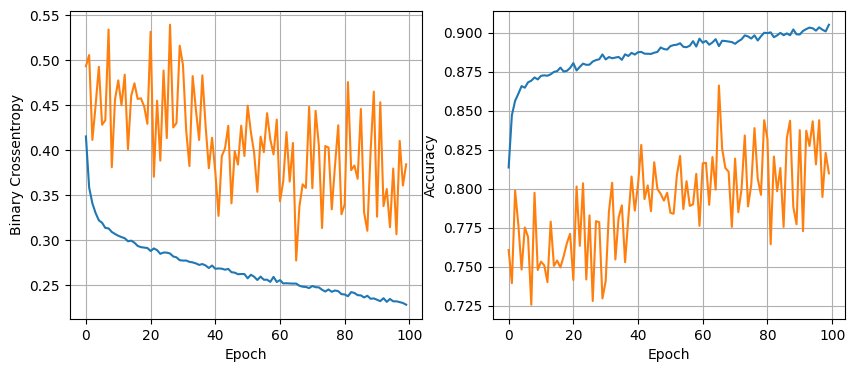

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.8666 - loss: 0.3437
32 nodes, dropout 0, lr 0.005, batch_size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7427 - loss: 0.5028 - val_accuracy: 0.7412 - val_loss: 0.4883
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.8462 - loss: 0.3583 - val_accuracy: 0.7055 - val_loss: 0.5733
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.8564 - loss: 0.3443 - val_accuracy: 0.7234 - val_loss: 0.5541
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.8562 - loss: 0.3370 - val_accuracy: 0.7399 - val_loss: 0.4917
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.8667 - loss: 0.3204 - val_accuracy: 0.7301 - val_loss: 0.5209
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.8655 - loss: 0.3134 - val_accuracy: 0.7510 - val_loss: 0.4552
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.8712 - loss: 0.3110 - val_accuracy: 0.

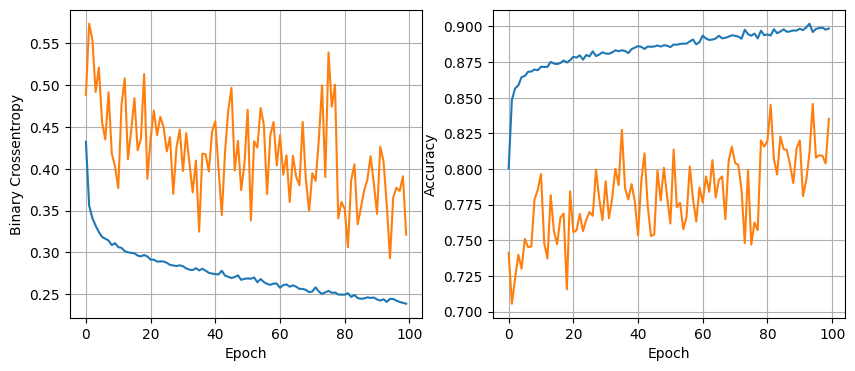

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.8698 - loss: 0.3391
32 nodes, dropout 0, lr 0.001, batch_size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 501us/step - accuracy: 0.7253 - loss: 0.5364 - val_accuracy: 0.6985 - val_loss: 0.5496
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.8304 - loss: 0.3898 - val_accuracy: 0.7143 - val_loss: 0.5460
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.8490 - loss: 0.3629 - val_accuracy: 0.7220 - val_loss: 0.5355
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.8502 - loss: 0.3571 - val_accuracy: 0.7143 - val_loss: 0.5509
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.8568 - loss: 0.3379 - val_accuracy: 0.7133 - val_loss: 0.5527
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.8600 - loss: 0.3307 - val_accuracy: 0.7180 - val_loss: 0.5488
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.8631 - loss: 0.3244 - v

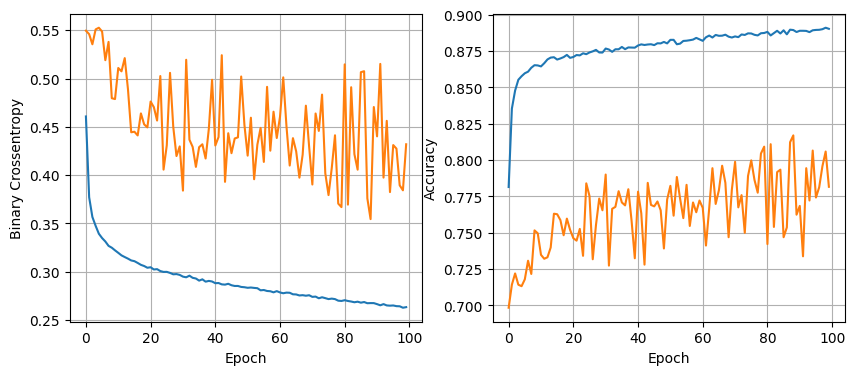

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.8750 - loss: 0.3116
32 nodes, dropout 0, lr 0.001, batch_size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.6675 - loss: 0.5830 - val_accuracy: 0.5947 - val_loss: 0.6629
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.8197 - loss: 0.4023 - val_accuracy: 0.6786 - val_loss: 0.5729
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.8425 - loss: 0.3706 - val_accuracy: 0.7187 - val_loss: 0.5455
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.8530 - loss: 0.3529 - val_accuracy: 0.7332 - val_loss: 0.5204
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.8636 - loss: 0.3328 - val_accuracy: 0.7342 - val_loss: 0.5207
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.8568 - loss: 0.3375 - val_accuracy: 0.7584 - val_loss: 0.4737
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.8638 - loss: 0.3374 - v

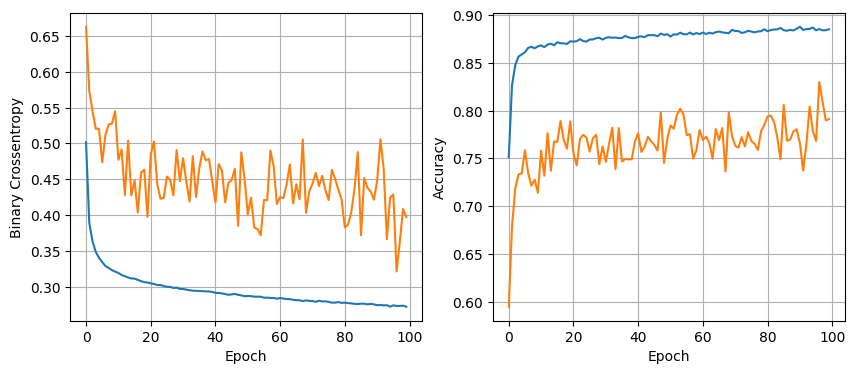

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - accuracy: 0.8700 - loss: 0.3235
32 nodes, dropout 0, lr 0.001, batch_size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6791 - loss: 0.6284 - val_accuracy: 0.6014 - val_loss: 0.6709
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.8105 - loss: 0.4166 - val_accuracy: 0.6567 - val_loss: 0.5993
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.8239 - loss: 0.3954 - val_accuracy: 0.7177 - val_loss: 0.5168
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.8382 - loss: 0.3797 - val_accuracy: 0.7065 - val_loss: 0.5476
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.8465 - loss: 0.3685 - val_accuracy: 0.7217 - val_loss: 0.5404
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.8487 - loss: 0.3575 - val_accuracy: 0.7028 - val_loss: 0.5593
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.8481 - loss: 0.3568 - val_accuracy: 0.

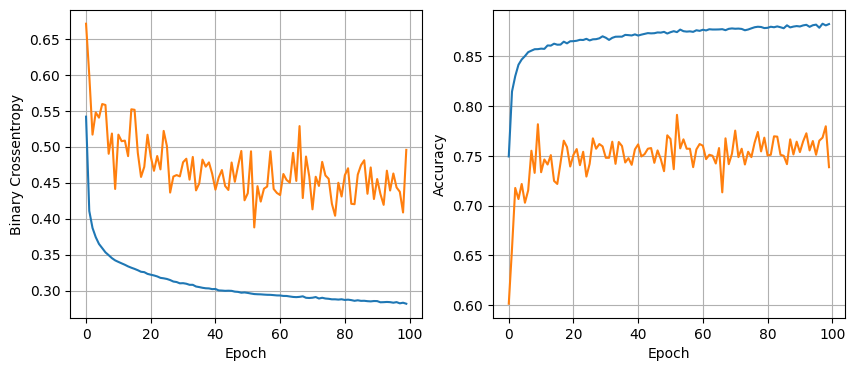

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - accuracy: 0.8697 - loss: 0.3274
32 nodes, dropout 0.2, lr 0.1, batch_size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 516us/step - accuracy: 0.7424 - loss: 0.5567 - val_accuracy: 0.9124 - val_loss: 0.5087
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.7237 - loss: 0.5656 - val_accuracy: 0.2311 - val_loss: 0.9447
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - accuracy: 0.7131 - loss: 0.6092 - val_accuracy: 0.2732 - val_loss: 0.8181
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.7104 - loss: 0.6132 - val_accuracy: 0.3029 - val_loss: 0.9723
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - accuracy: 0.7016 - loss: 0.6359 - val_accuracy: 0.0077 - val_loss: 1.0437
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.6519 - loss: 0.6579 - val_accuracy: 0.0735 - val_loss: 0.9168
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - accuracy: 0.6700 - loss: 0.6322 - v

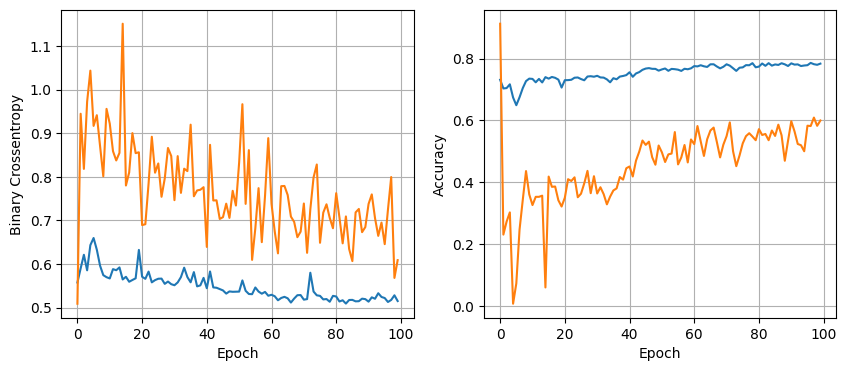

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.8491 - loss: 0.4316
32 nodes, dropout 0.2, lr 0.1, batch_size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.7597 - loss: 0.5130 - val_accuracy: 0.4535 - val_loss: 0.7359
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.7773 - loss: 0.4809 - val_accuracy: 0.7601 - val_loss: 0.3547
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.7710 - loss: 0.4713 - val_accuracy: 0.5502 - val_loss: 0.5734
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.7931 - loss: 0.4502 - val_accuracy: 0.5054 - val_loss: 0.6058
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.8085 - loss: 0.4347 - val_accuracy: 0.6277 - val_loss: 0.5520
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.7986 - loss: 0.4644 - val_accuracy: 0.5627 - val_loss: 0.6933
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.7909 - loss: 0.4599 - v

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.7971 - loss: 0.4664
32 nodes, dropout 0.2, lr 0.1, batch_size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7610 - loss: 0.5186 - val_accuracy: 0.5226 - val_loss: 0.6492
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.8009 - loss: 0.4418 - val_accuracy: 0.6290 - val_loss: 0.5624
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.8221 - loss: 0.4083 - val_accuracy: 0.7261 - val_loss: 0.4502
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.8099 - loss: 0.4251 - val_accuracy: 0.4232 - val_loss: 0.8472
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.8071 - loss: 0.4274 - val_accuracy: 0.6048 - val_loss: 0.4852
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.8245 - loss: 0.4232 - val_accuracy: 0.6850 - val_loss: 0.5312
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.8191 - loss: 0.4094 - val_accuracy: 0.

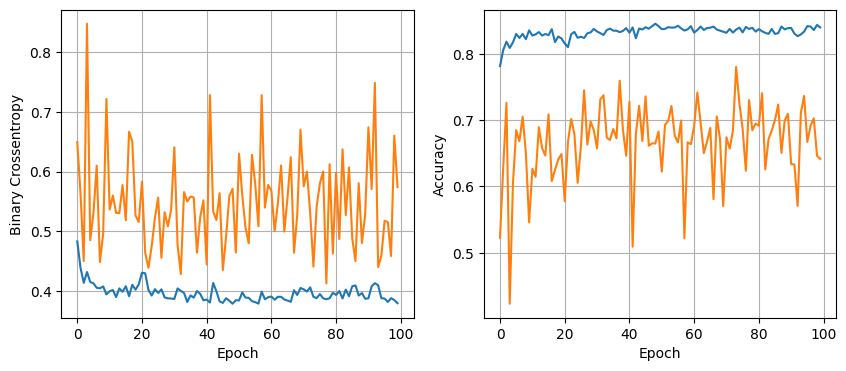

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.8484 - loss: 0.3759
32 nodes, dropout 0.2, lr 0.005, batch_size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 522us/step - accuracy: 0.7710 - loss: 0.4803 - val_accuracy: 0.6927 - val_loss: 0.5301
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - accuracy: 0.8369 - loss: 0.3909 - val_accuracy: 0.6816 - val_loss: 0.5656
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - accuracy: 0.8454 - loss: 0.3751 - val_accuracy: 0.7183 - val_loss: 0.5168
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - accuracy: 0.8449 - loss: 0.3644 - val_accuracy: 0.6826 - val_loss: 0.6158
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 0.8524 - loss: 0.3514 - val_accuracy: 0.7379 - val_loss: 0.5015
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - accuracy: 0.8470 - loss: 0.3594 - val_accuracy: 0.7227 - val_loss: 0.5432
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - accuracy: 0.8519 - loss: 0.3490 -

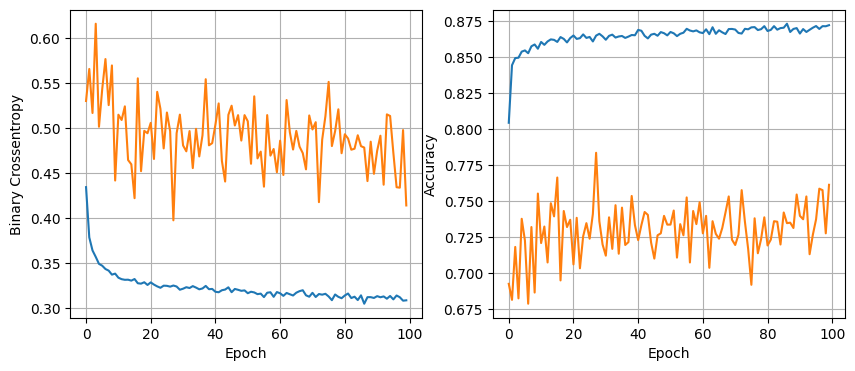

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.8751 - loss: 0.3014
32 nodes, dropout 0.2, lr 0.005, batch_size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step - accuracy: 0.7610 - loss: 0.4862 - val_accuracy: 0.7180 - val_loss: 0.5159
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.8301 - loss: 0.3895 - val_accuracy: 0.7726 - val_loss: 0.4498
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.8438 - loss: 0.3683 - val_accuracy: 0.6934 - val_loss: 0.5637
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.8532 - loss: 0.3491 - val_accuracy: 0.7402 - val_loss: 0.4761
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.8539 - loss: 0.3473 - val_accuracy: 0.7244 - val_loss: 0.5114
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.8532 - loss: 0.3415 - val_accuracy: 0.7244 - val_loss: 0.4907
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8595 - loss: 0.3356 -

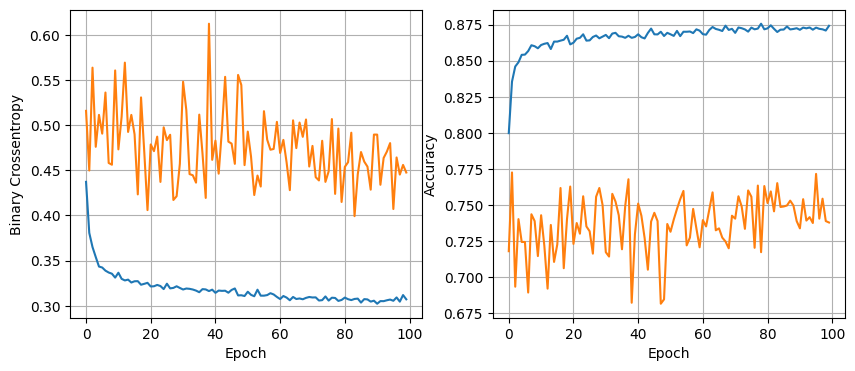

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.8714 - loss: 0.3046
32 nodes, dropout 0.2, lr 0.005, batch_size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7336 - loss: 0.5513 - val_accuracy: 0.6334 - val_loss: 0.6154
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.8154 - loss: 0.4173 - val_accuracy: 0.7011 - val_loss: 0.5524
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.8351 - loss: 0.3892 - val_accuracy: 0.6435 - val_loss: 0.6402
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.8476 - loss: 0.3679 - val_accuracy: 0.6887 - val_loss: 0.5834
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.8478 - loss: 0.3584 - val_accuracy: 0.7328 - val_loss: 0.4959
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.8526 - loss: 0.3518 - val_accuracy: 0.7544 - val_loss: 0.4547
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.8579 - loss: 0.3454 - val_accuracy: 

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.8716 - loss: 0.3005
32 nodes, dropout 0.2, lr 0.001, batch_size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 509us/step - accuracy: 0.6742 - loss: 0.5995 - val_accuracy: 0.6199 - val_loss: 0.6344
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.7991 - loss: 0.4324 - val_accuracy: 0.6375 - val_loss: 0.6252
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.8249 - loss: 0.4058 - val_accuracy: 0.6745 - val_loss: 0.5815
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.8318 - loss: 0.3935 - val_accuracy: 0.6961 - val_loss: 0.5566
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - accuracy: 0.8333 - loss: 0.3890 - val_accuracy: 0.7089 - val_loss: 0.5502
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - accuracy: 0.8419 - loss: 0.3757 - val_accuracy: 0.6715 - val_loss: 0.6124
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.8449 - loss: 0.3722 -

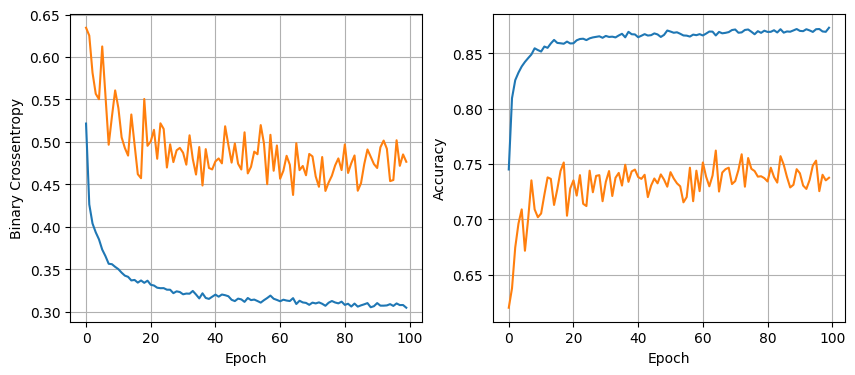

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8787 - loss: 0.2956
32 nodes, dropout 0.2, lr 0.001, batch_size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.6695 - loss: 0.6243 - val_accuracy: 0.6082 - val_loss: 0.6784
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.7927 - loss: 0.4531 - val_accuracy: 0.6429 - val_loss: 0.6180
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.8090 - loss: 0.4259 - val_accuracy: 0.6432 - val_loss: 0.6053
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.8182 - loss: 0.4083 - val_accuracy: 0.6634 - val_loss: 0.5980
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.8273 - loss: 0.3952 - val_accuracy: 0.7065 - val_loss: 0.5540
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.8386 - loss: 0.3846 - val_accuracy: 0.7011 - val_loss: 0.5669
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.8416 - loss: 0.3815 - v

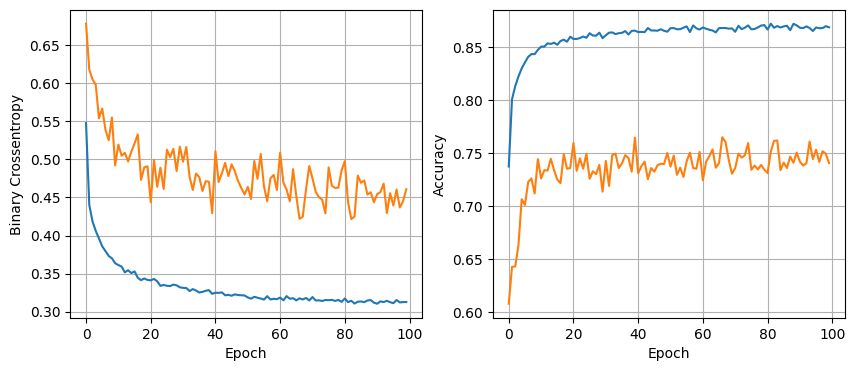

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.8610 - loss: 0.3075
32 nodes, dropout 0.2, lr 0.001, batch_size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6002 - loss: 0.6531 - val_accuracy: 0.5536 - val_loss: 0.6975
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.7827 - loss: 0.4678 - val_accuracy: 0.6270 - val_loss: 0.6456
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.7988 - loss: 0.4402 - val_accuracy: 0.6220 - val_loss: 0.6553
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.8205 - loss: 0.4119 - val_accuracy: 0.6570 - val_loss: 0.6049
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.8143 - loss: 0.4127 - val_accuracy: 0.6846 - val_loss: 0.5778
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.8251 - loss: 0.4017 - val_accuracy: 0.6924 - val_loss: 0.5818
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.8329 - loss: 0.3900 - val_accuracy: 

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.8675 - loss: 0.3050
64 nodes, dropout 0, lr 0.1, batch_size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.7639 - loss: 0.5361 - val_accuracy: 0.5549 - val_loss: 0.5046
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.8145 - loss: 0.4276 - val_accuracy: 0.7150 - val_loss: 0.5084
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - accuracy: 0.8116 - loss: 0.4518 - val_accuracy: 0.7854 - val_loss: 0.5373
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.8377 - loss: 0.4071 - val_accuracy: 0.8133 - val_loss: 0.3799
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.8405 - loss: 0.3896 - val_accuracy: 0.7332 - val_loss: 0.9911
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.8345 - loss: 0.4089 - val_accuracy: 0.7490 - val_loss: 0.5375
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - accuracy: 0.8453 - loss: 0.3912 - val

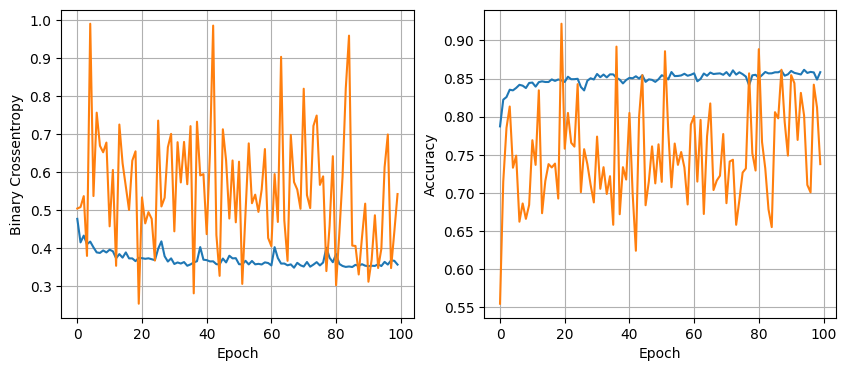

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.8577 - loss: 0.3596
64 nodes, dropout 0, lr 0.1, batch_size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - accuracy: 0.7666 - loss: 0.5157 - val_accuracy: 0.5354 - val_loss: 0.6438
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.8318 - loss: 0.4120 - val_accuracy: 0.5957 - val_loss: 0.4447
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.8272 - loss: 0.4032 - val_accuracy: 0.5977 - val_loss: 0.8001
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.8476 - loss: 0.3738 - val_accuracy: 0.6129 - val_loss: 0.6932
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.8441 - loss: 0.3692 - val_accuracy: 0.5788 - val_loss: 0.7012
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.8432 - loss: 0.3663 - val_accuracy: 0.6260 - val_loss: 0.5328
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.8489 - loss: 0.3699 - val

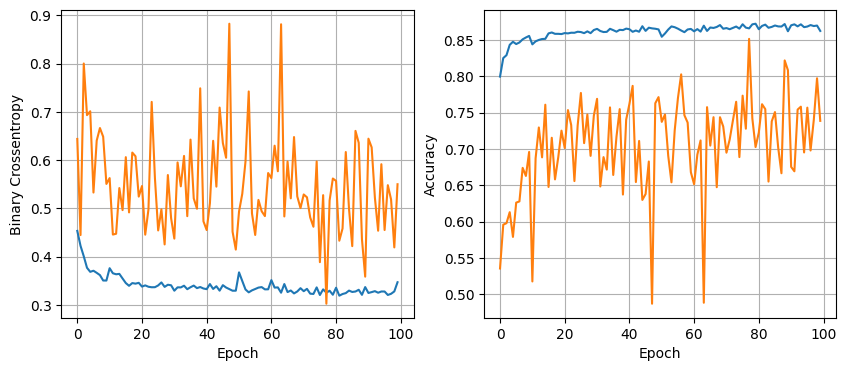

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.8677 - loss: 0.3690
64 nodes, dropout 0, lr 0.1, batch_size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7401 - loss: 0.6107 - val_accuracy: 0.6085 - val_loss: 0.6983
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.8366 - loss: 0.3899 - val_accuracy: 0.8026 - val_loss: 0.3658
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.8571 - loss: 0.3438 - val_accuracy: 0.7355 - val_loss: 0.5391
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.8501 - loss: 0.3512 - val_accuracy: 0.7594 - val_loss: 0.4545
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.8520 - loss: 0.3527 - val_accuracy: 0.7662 - val_loss: 0.4005
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.8550 - loss: 0.3503 - val_accuracy: 0.6341 - val_loss: 0.5165
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.8517 - loss: 0.3561 - val_accuracy: 0.73

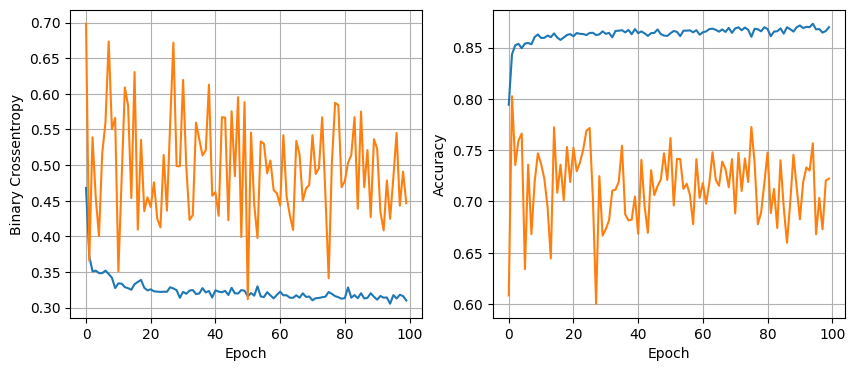

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.8548 - loss: 0.3414
64 nodes, dropout 0, lr 0.005, batch_size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 514us/step - accuracy: 0.8069 - loss: 0.4328 - val_accuracy: 0.7557 - val_loss: 0.4448
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - accuracy: 0.8592 - loss: 0.3426 - val_accuracy: 0.7955 - val_loss: 0.3690
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.8670 - loss: 0.3191 - val_accuracy: 0.7837 - val_loss: 0.4014
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.8708 - loss: 0.3204 - val_accuracy: 0.7311 - val_loss: 0.5177
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.8673 - loss: 0.3159 - val_accuracy: 0.6533 - val_loss: 0.6787
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.8677 - loss: 0.3157 - val_accuracy: 0.7719 - val_loss: 0.4220
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.8673 - loss: 0.3076 - v

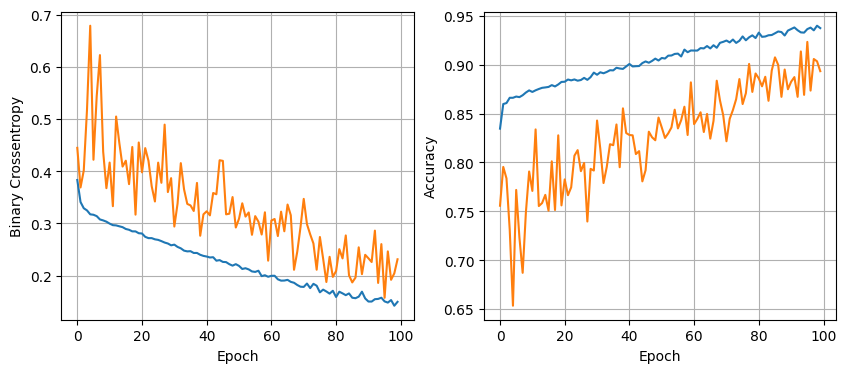

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.8560 - loss: 0.6378
64 nodes, dropout 0, lr 0.005, batch_size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.7970 - loss: 0.4505 - val_accuracy: 0.6600 - val_loss: 0.6340
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.8442 - loss: 0.3599 - val_accuracy: 0.7217 - val_loss: 0.5090
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.8651 - loss: 0.3271 - val_accuracy: 0.7699 - val_loss: 0.4379
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.8667 - loss: 0.3198 - val_accuracy: 0.7136 - val_loss: 0.5547
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.8672 - loss: 0.3124 - val_accuracy: 0.7416 - val_loss: 0.4967
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.8704 - loss: 0.3130 - val_accuracy: 0.7328 - val_loss: 0.4749
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.8702 - loss: 0.3053 - v

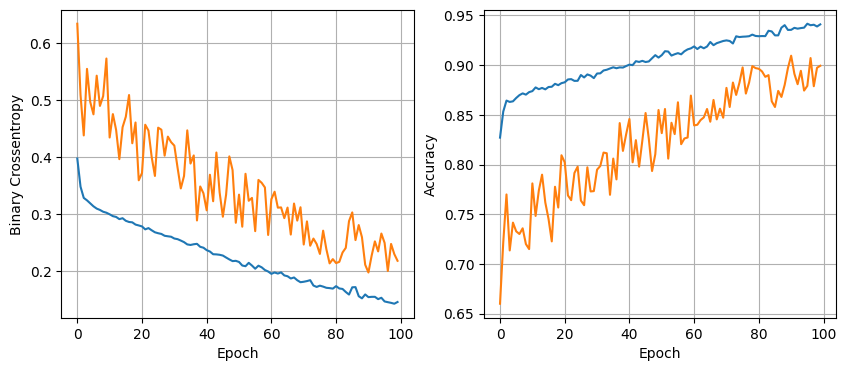

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.8513 - loss: 0.5533
64 nodes, dropout 0, lr 0.005, batch_size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7911 - loss: 0.4584 - val_accuracy: 0.7490 - val_loss: 0.5223
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.8544 - loss: 0.3548 - val_accuracy: 0.7163 - val_loss: 0.5400
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.8598 - loss: 0.3405 - val_accuracy: 0.7695 - val_loss: 0.4293
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.8633 - loss: 0.3241 - val_accuracy: 0.7143 - val_loss: 0.5615
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.8743 - loss: 0.3040 - val_accuracy: 0.7423 - val_loss: 0.4605
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.8731 - loss: 0.3111 - val_accuracy: 0.7227 - val_loss: 0.5324
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.8672 - loss: 0.3121 - val_accuracy: 0.

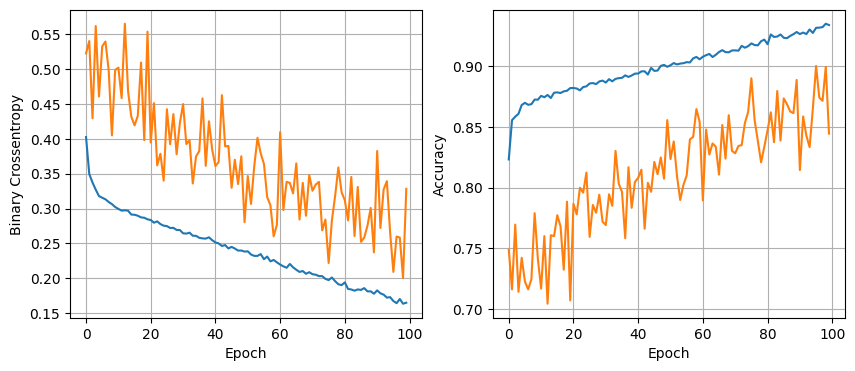

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.8541 - loss: 0.4655
64 nodes, dropout 0, lr 0.001, batch_size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 537us/step - accuracy: 0.7714 - loss: 0.4832 - val_accuracy: 0.6870 - val_loss: 0.5613
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - accuracy: 0.8435 - loss: 0.3722 - val_accuracy: 0.7796 - val_loss: 0.4340
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - accuracy: 0.8583 - loss: 0.3446 - val_accuracy: 0.7429 - val_loss: 0.4978
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - accuracy: 0.8641 - loss: 0.3342 - val_accuracy: 0.7426 - val_loss: 0.5092
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.8657 - loss: 0.3257 - val_accuracy: 0.7702 - val_loss: 0.4262
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.8730 - loss: 0.3157 - val_accuracy: 0.7153 - val_loss: 0.5378
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.8668 - loss: 0.3168 - v

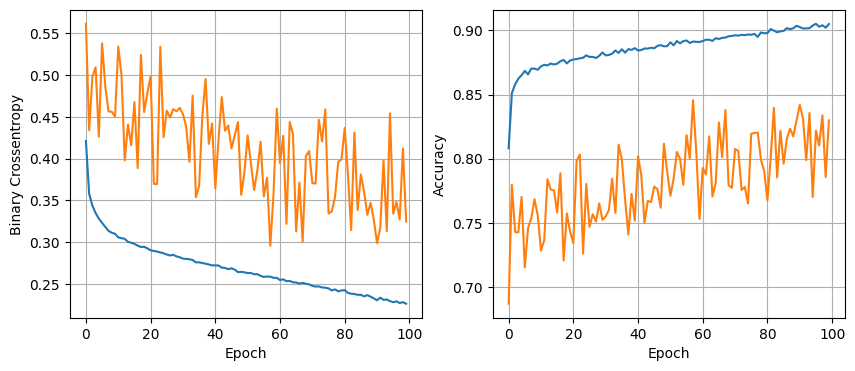

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.8621 - loss: 0.3372
64 nodes, dropout 0, lr 0.001, batch_size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 797us/step - accuracy: 0.7453 - loss: 0.5447 - val_accuracy: 0.6398 - val_loss: 0.6407
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.8400 - loss: 0.3677 - val_accuracy: 0.7534 - val_loss: 0.4880
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.8594 - loss: 0.3425 - val_accuracy: 0.7193 - val_loss: 0.5345
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.8559 - loss: 0.3450 - val_accuracy: 0.7527 - val_loss: 0.4896
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.8588 - loss: 0.3333 - val_accuracy: 0.7402 - val_loss: 0.5330
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.8613 - loss: 0.3318 - val_accuracy: 0.7436 - val_loss: 0.5007
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.8687 - loss: 0.3184 - v

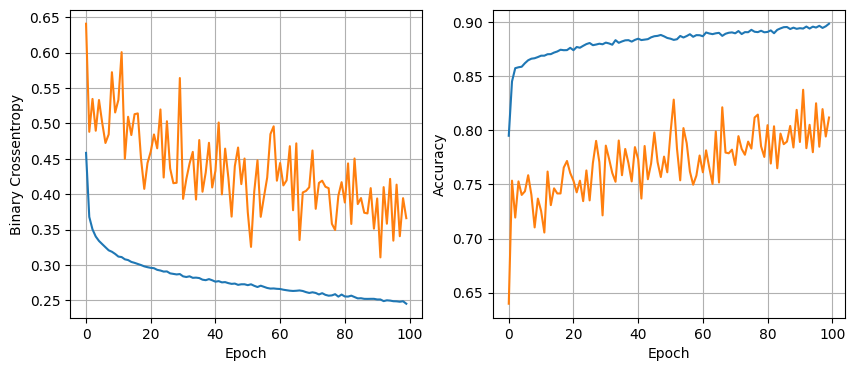

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.8652 - loss: 0.3186
64 nodes, dropout 0, lr 0.001, batch_size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7058 - loss: 0.5670 - val_accuracy: 0.6739 - val_loss: 0.5822
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.8211 - loss: 0.3964 - val_accuracy: 0.6856 - val_loss: 0.5740
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.8502 - loss: 0.3621 - val_accuracy: 0.7257 - val_loss: 0.5323
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.8591 - loss: 0.3461 - val_accuracy: 0.7530 - val_loss: 0.4836
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.8588 - loss: 0.3410 - val_accuracy: 0.7497 - val_loss: 0.4938
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.8594 - loss: 0.3370 - val_accuracy: 0.7480 - val_loss: 0.4963
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.8611 - loss: 0.3334 - val_accuracy: 0.

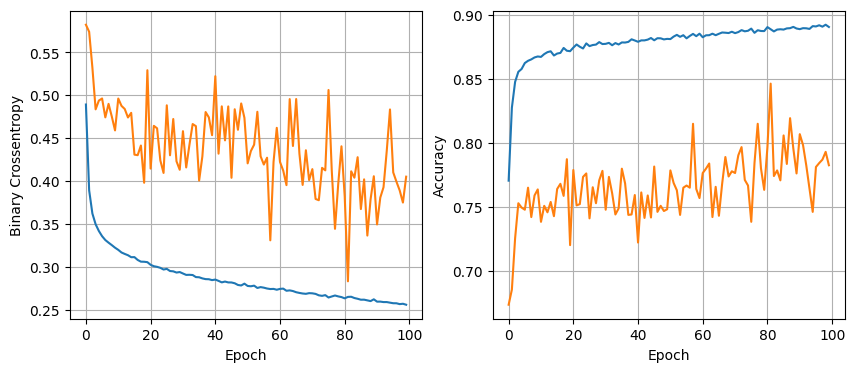

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.8641 - loss: 0.3144
64 nodes, dropout 0.2, lr 0.1, batch_size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 551us/step - accuracy: 0.7386 - loss: 0.6052 - val_accuracy: 0.0916 - val_loss: 0.8395
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.6373 - loss: 0.6719 - val_accuracy: 0.0017 - val_loss: 0.8495
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.6313 - loss: 0.6698 - val_accuracy: 0.0000e+00 - val_loss: 1.0048
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.6201 - loss: 0.6655 - val_accuracy: 0.0189 - val_loss: 0.9076
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.6297 - loss: 0.6947 - val_accuracy: 0.0000e+00 - val_loss: 0.9669
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.6220 - loss: 0.6656 - val_accuracy: 0.0000e+00 - val_loss: 1.0883
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.6295 - loss

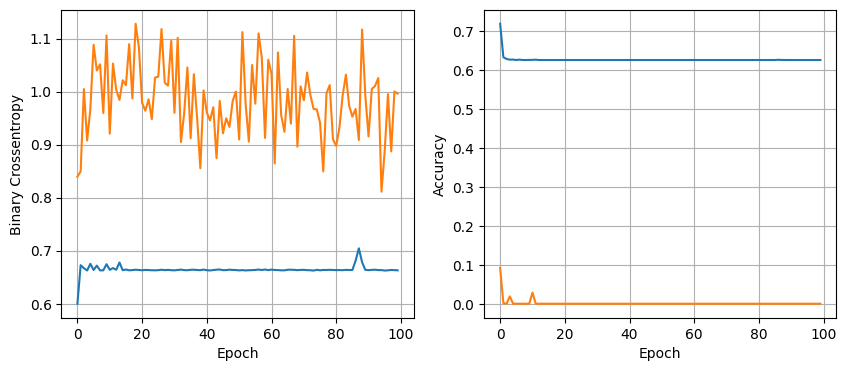

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.6490 - loss: 0.6488
64 nodes, dropout 0.2, lr 0.1, batch_size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - accuracy: 0.7360 - loss: 0.5876 - val_accuracy: 0.4441 - val_loss: 0.6361
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.7671 - loss: 0.4771 - val_accuracy: 0.5317 - val_loss: 0.6868
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.7753 - loss: 0.4944 - val_accuracy: 0.4606 - val_loss: 0.9479
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.7705 - loss: 0.5387 - val_accuracy: 0.2396 - val_loss: 0.9063
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.7071 - loss: 0.6041 - val_accuracy: 0.0778 - val_loss: 0.8946
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.6590 - loss: 0.6014 - val_accuracy: 0.1509 - val_loss: 1.0337
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.6675 - loss: 0.6323 - v

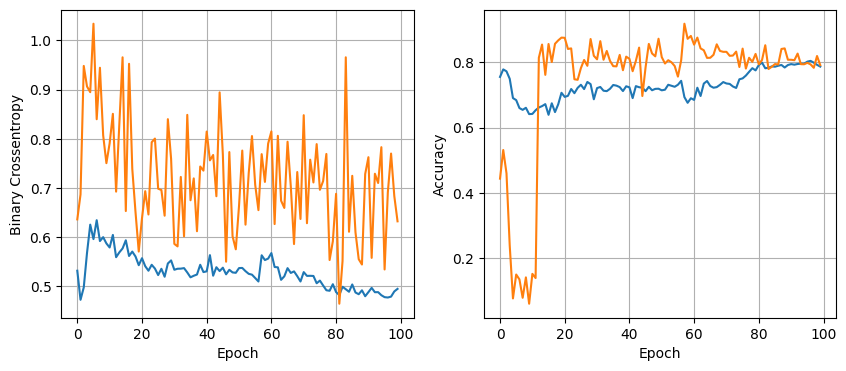

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.8357 - loss: 0.4334
64 nodes, dropout 0.2, lr 0.1, batch_size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7417 - loss: 0.6023 - val_accuracy: 0.6247 - val_loss: 0.6042
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.8021 - loss: 0.4344 - val_accuracy: 0.6071 - val_loss: 0.7073
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.8327 - loss: 0.4051 - val_accuracy: 0.6173 - val_loss: 0.5485
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.8068 - loss: 0.4347 - val_accuracy: 0.6058 - val_loss: 0.5597
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.8226 - loss: 0.4155 - val_accuracy: 0.5580 - val_loss: 0.6411
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.8211 - loss: 0.4076 - val_accuracy: 0.5576 - val_loss: 0.6715
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.8049 - loss: 0.4420 - val_accuracy: 0.

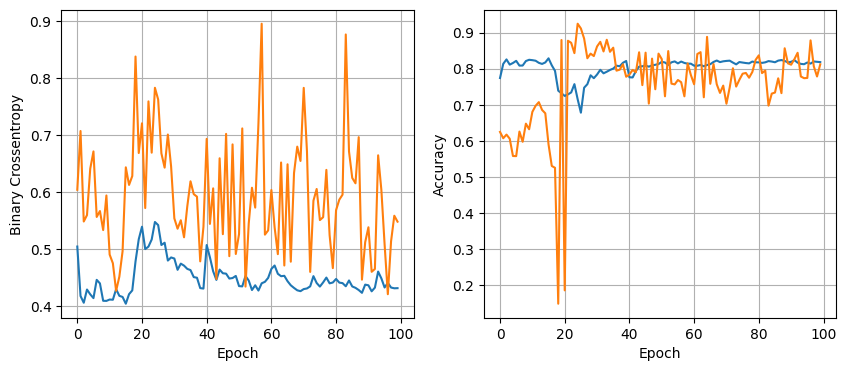

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.8413 - loss: 0.3973
64 nodes, dropout 0.2, lr 0.005, batch_size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 569us/step - accuracy: 0.7835 - loss: 0.4600 - val_accuracy: 0.6823 - val_loss: 0.5944
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.8509 - loss: 0.3574 - val_accuracy: 0.7500 - val_loss: 0.4316
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.8581 - loss: 0.3443 - val_accuracy: 0.7497 - val_loss: 0.4487
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.8591 - loss: 0.3428 - val_accuracy: 0.6654 - val_loss: 0.6086
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.8564 - loss: 0.3338 - val_accuracy: 0.6937 - val_loss: 0.5246
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.8577 - loss: 0.3374 - val_accuracy: 0.7163 - val_loss: 0.5359
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.8660 - loss: 0.3265 -

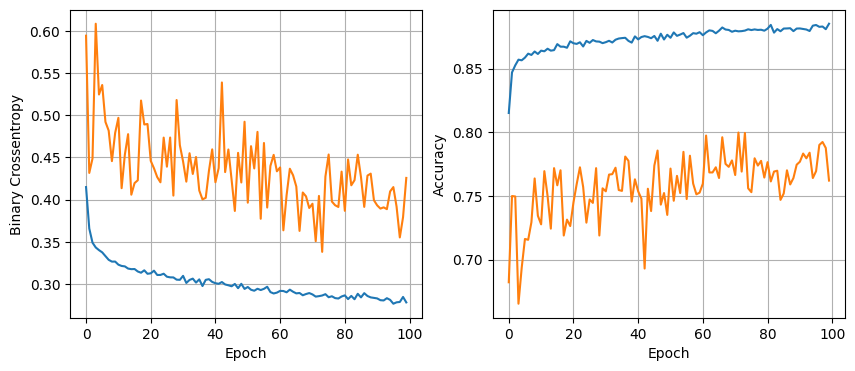

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.8776 - loss: 0.3013
64 nodes, dropout 0.2, lr 0.005, batch_size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.7780 - loss: 0.4767 - val_accuracy: 0.6627 - val_loss: 0.6625
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.8459 - loss: 0.3644 - val_accuracy: 0.7470 - val_loss: 0.4928
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.8503 - loss: 0.3541 - val_accuracy: 0.7123 - val_loss: 0.5359
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.8570 - loss: 0.3393 - val_accuracy: 0.7598 - val_loss: 0.4412
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.8571 - loss: 0.3374 - val_accuracy: 0.7396 - val_loss: 0.4796
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.8631 - loss: 0.3190 - val_accuracy: 0.7086 - val_loss: 0.5538
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.8682 - loss: 0.3187 -

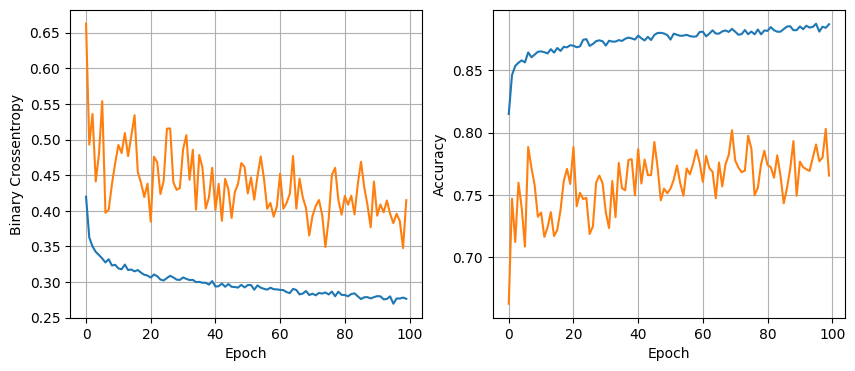

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.8801 - loss: 0.2952
64 nodes, dropout 0.2, lr 0.005, batch_size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7441 - loss: 0.5071 - val_accuracy: 0.6937 - val_loss: 0.5503
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.8327 - loss: 0.3882 - val_accuracy: 0.6641 - val_loss: 0.6239
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.8488 - loss: 0.3596 - val_accuracy: 0.6867 - val_loss: 0.5562
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.8474 - loss: 0.3530 - val_accuracy: 0.7022 - val_loss: 0.5604
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.8583 - loss: 0.3357 - val_accuracy: 0.6998 - val_loss: 0.5414
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.8633 - loss: 0.3306 - val_accuracy: 0.7551 - val_loss: 0.4502
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.8640 - loss: 0.3202 - val_accuracy: 

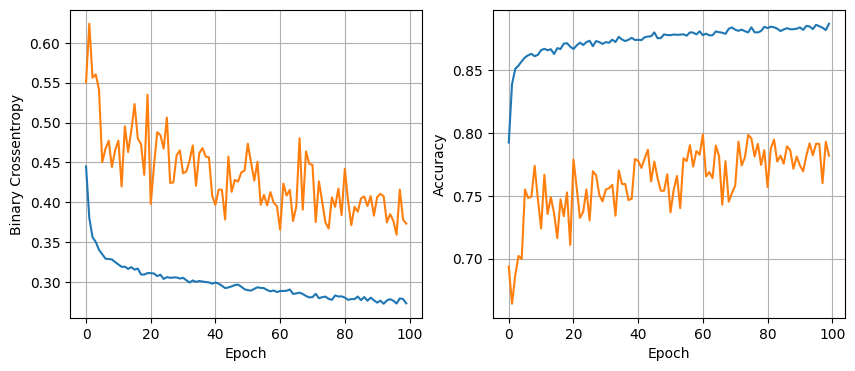

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.8797 - loss: 0.3034
64 nodes, dropout 0.2, lr 0.001, batch_size 32
Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 544us/step - accuracy: 0.7458 - loss: 0.5260 - val_accuracy: 0.6691 - val_loss: 0.6098
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8253 - loss: 0.3971 - val_accuracy: 0.6971 - val_loss: 0.5502
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.8383 - loss: 0.3796 - val_accuracy: 0.7230 - val_loss: 0.5277
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.8569 - loss: 0.3488 - val_accuracy: 0.7338 - val_loss: 0.5139
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.8527 - loss: 0.3542 - val_accuracy: 0.7160 - val_loss: 0.5406
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.8527 - loss: 0.3506 - val_accuracy: 0.7423 - val_loss: 0.4878
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.8645 - loss: 0.3341 -

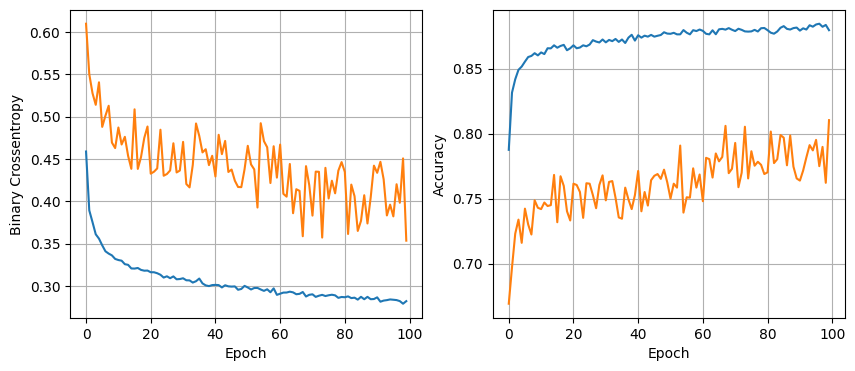

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.8785 - loss: 0.2976
64 nodes, dropout 0.2, lr 0.001, batch_size 64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - accuracy: 0.6926 - loss: 0.5678 - val_accuracy: 0.6247 - val_loss: 0.6368
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.8172 - loss: 0.4048 - val_accuracy: 0.6786 - val_loss: 0.5835
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.8341 - loss: 0.3822 - val_accuracy: 0.6755 - val_loss: 0.6144
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.8422 - loss: 0.3736 - val_accuracy: 0.7022 - val_loss: 0.5657
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.8492 - loss: 0.3603 - val_accuracy: 0.7406 - val_loss: 0.5152
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.8526 - loss: 0.3580 - val_accuracy: 0.7362 - val_loss: 0.5130
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.8470 - loss: 0.3606 -

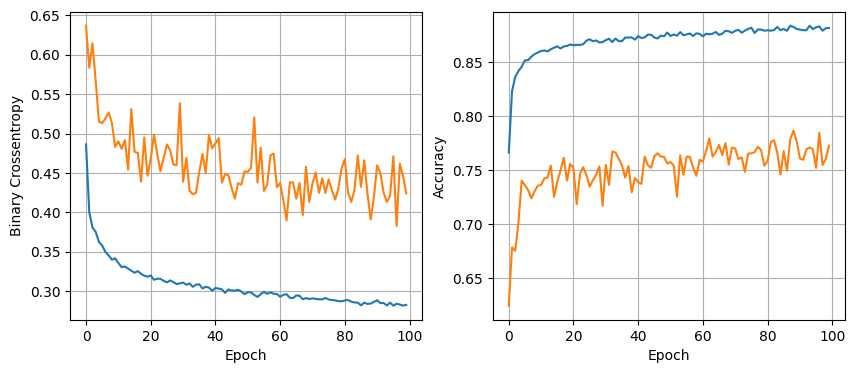

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.8763 - loss: 0.2955
64 nodes, dropout 0.2, lr 0.001, batch_size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7251 - loss: 0.5754 - val_accuracy: 0.5937 - val_loss: 0.6618
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.8004 - loss: 0.4330 - val_accuracy: 0.6449 - val_loss: 0.6018
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.8210 - loss: 0.4046 - val_accuracy: 0.6675 - val_loss: 0.6007
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.8375 - loss: 0.3778 - val_accuracy: 0.7089 - val_loss: 0.5490
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.8445 - loss: 0.3679 - val_accuracy: 0.7133 - val_loss: 0.5291
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.8418 - loss: 0.3708 - val_accuracy: 0.7086 - val_loss: 0.5459
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.8493 - loss: 0.3604 - val_accuracy: 

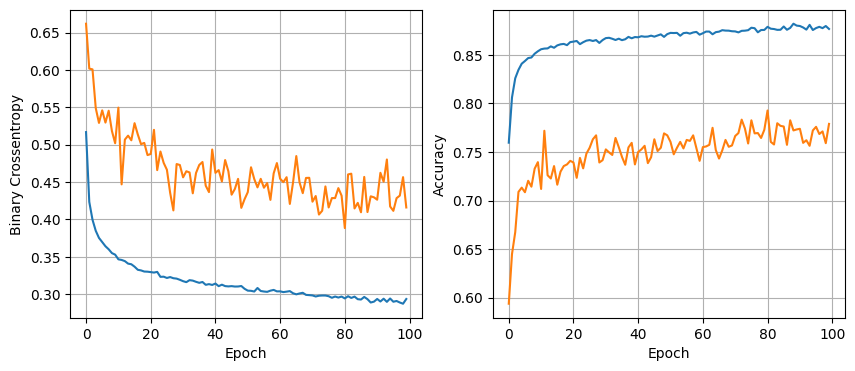

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.8762 - loss: 0.2978


In [105]:
least_val_loss = float('inf')
least_loss_param = None

epochs=100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.1, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [108]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step


In [109]:
y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1346
           1       0.88      0.95      0.91      2458

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.87      3804
weighted avg       0.88      0.88      0.88      3804

